In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

# Data Collection

In [ ]:
df = pd.read_csv('dataset_B_05_2020.csv')
df.head()

,url,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,...,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status
0,http://www.crestonwood.com/router.php,37,19,0,3,0,0,0,0,0,...,0,1,0,45,-1,0,1,1,4,legitimate
1,http://shadetreetechnology.com/V4/validation/a...,77,23,1,1,0,0,0,0,0,...,1,0,0,77,5767,0,0,1,2,phishing
2,https://support-appleld.com.secureupdate.duila...,126,50,1,4,1,0,1,2,0,...,1,0,0,14,4004,5828815,0,1,0,phishing
3,http://rgipt.ac.in,18,11,0,2,0,0,0,0,0,...,1,0,0,62,-1,107721,0,0,3,legitimate
4,http://www.iracing.com/tracks/gateway-motorspo...,55,15,0,2,2,0,0,0,0,...,0,1,0,224,8175,8725,0,0,6,legitimate


# EDA

In [ ]:
df.isna().sum()

,0
url,0
length_url,0
length_hostname,0
ip,0
nb_dots,0
...,...
web_traffic,0
dns_record,0
google_index,0
page_rank,0


In [ ]:
df.dtypes

,0
url,object
length_url,int64
length_hostname,int64
ip,int64
nb_dots,int64
...,...
web_traffic,int64
dns_record,int64
google_index,int64
page_rank,int64


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11430 entries, 0 to 11429
Data columns (total 89 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   url                         11430 non-null  object 
 1   length_url                  11430 non-null  int64  
 2   length_hostname             11430 non-null  int64  
 3   ip                          11430 non-null  int64  
 4   nb_dots                     11430 non-null  int64  
 5   nb_hyphens                  11430 non-null  int64  
 6   nb_at                       11430 non-null  int64  
 7   nb_qm                       11430 non-null  int64  
 8   nb_and                      11430 non-null  int64  
 9   nb_or                       11430 non-null  int64  
 10  nb_eq                       11430 non-null  int64  
 11  nb_underscore               11430 non-null  int64  
 12  nb_tilde                    11430 non-null  int64  
 13  nb_percent                  114

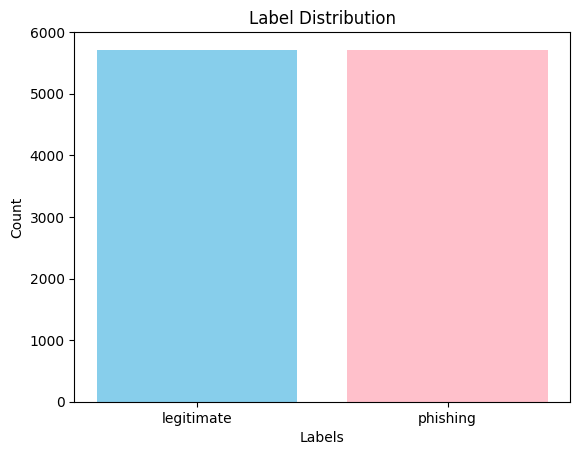

In [ ]:
label_counts = df['status'].value_counts()

# Create bar plot
fig, ax = plt.subplots()
ax.bar(label_counts.index, label_counts.values, color=['skyblue', 'pink'])

# Set labels and title
ax.set_xlabel('Labels')
ax.set_ylabel('Count')
ax.set_title('Label Distribution')

# Show plot
plt.show()

# Data Preprocessing

In [ ]:
df = df.drop(['url'], axis=1)

## Label Encoding



In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['status'] = label_encoder.fit_transform(df['status'])

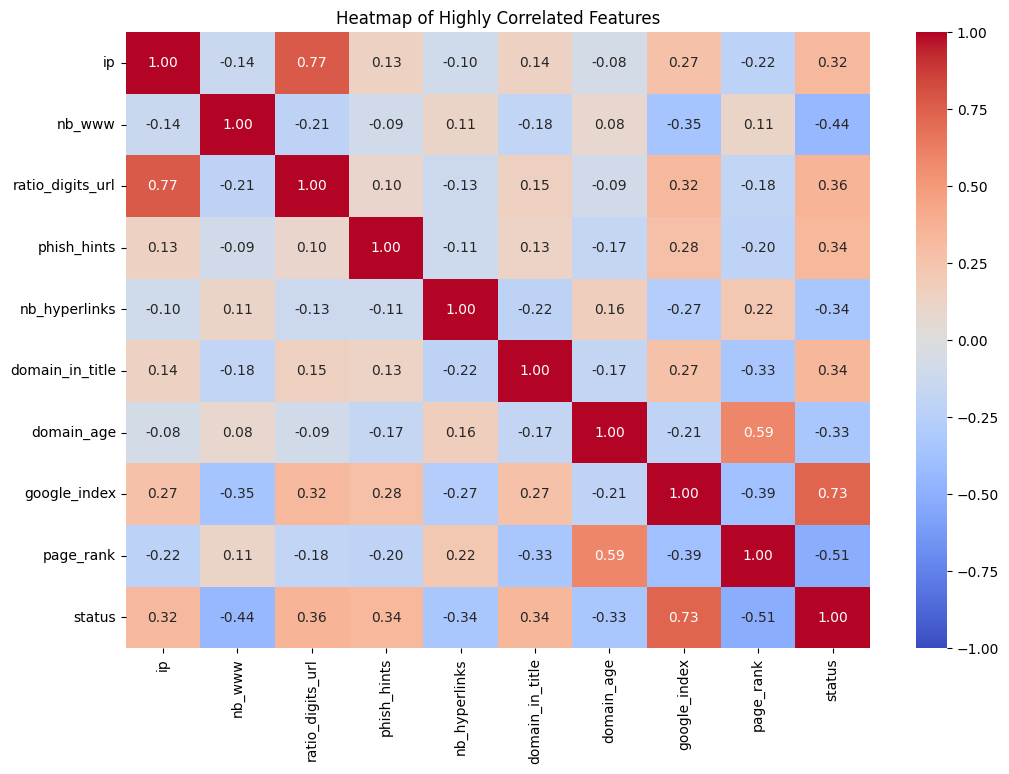

In [ ]:
correlation_matrix = df.corr()

# Threshold for high correlation (e.g., |correlation| > 0.5)
threshold = 0.3

# Identify features that have high correlation with the target variable
target_corr = correlation_matrix['status'].abs()
high_corr_features = target_corr[target_corr > threshold].index

# Create a filtered correlation matrix
filtered_corr_matrix = correlation_matrix.loc[high_corr_features, high_corr_features]

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(filtered_corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.title('Heatmap of Highly Correlated Features')
plt.show()

In [ ]:
df.dtypes

,0
length_url,int64
length_hostname,int64
ip,int64
nb_dots,int64
nb_hyphens,int64
...,...
web_traffic,int64
dns_record,int64
google_index,int64
page_rank,int64


## Outlier Checking

In [ ]:
from scipy import stats

z = np.abs(stats.zscore(df['status']))

outliers = df[z > 3]

print(outliers.shape, df.shape)

df.drop(outliers.index, inplace=True)
print(df.shape)

(0, 88) (11430, 88)
(11430, 88)


# Data Split / Transformation

In [ ]:
X = df.drop('status', axis=1)
Y = df['status']

In [ ]:
# Normalization
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
# Train test Split
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=0.2, random_state=42)

In [ ]:
X_train.shape

(9144, 87)

In [ ]:
# Balancing data to prevent overfitting model

from imblearn.over_sampling import SMOTE

smote = SMOTE()
X_train, Y_train = smote.fit_resample(X_train, Y_train)

In [ ]:
X_train.shape

(9172, 87)

# Feature Importance

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_scaled, Y)

RandomForestClassifier()

[68 63 61 59  8 71 18 14 27 38 36 75 16 76 52 72 11 73 28 53 22 17 31 30
 29 15 23 34 21 55 80 54  5 65  7 84 19 33 35 66 12 24 77 10 51 37 60 32
 64 70 79 69  2  6  9 41 45 48  4 78 62 47 43 42 81 67 40 13  3 26 49 39
  1  0 44 25 74 50 57 46 58 82 20 83 56 86 85]


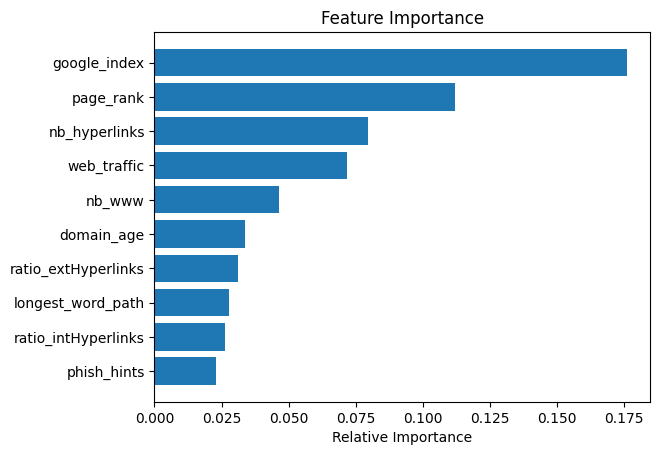

In [ ]:
importances = rfc.feature_importances_
sorted_idx = np.argsort(importances)

print(sorted_idx)

top_10_idx = sorted_idx[-10:]
top_10_idx = top_10_idx[np.argsort(importances[top_10_idx])]

padding = np.arange(len(top_10_idx)) + 0.5
plt.barh(padding, importances[top_10_idx], align='center')
plt.yticks(padding, X.columns[top_10_idx])
plt.xlabel("Relative Importance")
plt.title("Feature Importance")
plt.show()

# Modelling

## SCAK-NN

### Define the SCA

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

class SCA:
    def __init__(self, max_iter=100, pop_size=50, c=0.7):
        self.max_iter = max_iter
        self.pop_size = pop_size
        self.c = c

    def optimize(self, X_train, y_train, X_valid, y_valid):
        # Initialize the population
        pop = np.random.randint(1, 20, size=self.pop_size)
        best_fitness = float('inf')
        best_solution = None

        for t in range(self.max_iter):
            for i in range(self.pop_size):
                r1 = np.random.rand()
                r2 = np.random.rand()
                r3 = np.random.rand()
                r4 = np.random.rand()

                if t % 2 == 0:
                    pop[i] = int(pop[i] * r1 * np.sin(r2) + self.c * r3)
                else:
                    pop[i] = int(pop[i] * r1 * np.cos(r2) + self.c * r3)

                pop[i] = max(1, min(20, pop[i]))  # Ensure pop[i] stays within [1, 20]

                knn = KNeighborsClassifier(n_neighbors=pop[i])
                knn.fit(X_train, y_train)
                accuracy = knn.score(X_valid, y_valid)
                fitness = 1 - accuracy  # We aim to minimize the fitness

                if fitness < best_fitness:
                    best_fitness = fitness
                    best_solution = pop[i]

        return best_solution

### Determining k value using SCA

In [ ]:
# Split training data into train and validation sets for SCA
X_train_part, X_valid, y_train_part, y_valid = train_test_split(X_train, Y_train, test_size=0.2, random_state=42)

# Run SCA optimization
sca = SCA(max_iter=100, pop_size=50, c=0.7)
best_n_neighbors = sca.optimize(X_train_part, y_train_part, X_valid, y_valid)

print(best_n_neighbors)

5


### KNN Model Training and Testing

In [ ]:
# Train the KNN model with the optimized number of neighbors
knn = KNeighborsClassifier(n_neighbors=best_n_neighbors)
knn.fit(X_train, Y_train)

# Predict on the test set
y_pred = knn.predict(X_test)

### Evaluation

In [ ]:
from sklearn.metrics import classification_report
# Evaluate the model
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.96      0.95      1157
           1       0.96      0.93      0.94      1129

    accuracy                           0.94      2286
   macro avg       0.95      0.94      0.94      2286
weighted avg       0.95      0.94      0.94      2286



## Logistic Regression

### Model Training & Testing

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Train the Logistic Regression model
model_lr = LogisticRegression()
model_lr.fit(X_train, Y_train)

# Make predictions
y_pred_lr = model_lr.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Evaluation

In [ ]:
# Evaluate the model
accuracy = accuracy_score(Y_test, y_pred_lr)
conf_matrix = confusion_matrix(Y_test, y_pred_lr)
class_report = classification_report(Y_test, y_pred_lr)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

Accuracy: 0.9558180227471567
Confusion Matrix:
 [[1111   46]
 [  55 1074]]
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.96      0.96      1157
           1       0.96      0.95      0.96      1129

    accuracy                           0.96      2286
   macro avg       0.96      0.96      0.96      2286
weighted avg       0.96      0.96      0.96      2286



## Neural Network

### Epoch Determination

Epoch 1/30


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


230/230 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.6680 - loss: 0.6484 - val_accuracy: 0.9264 - val_loss: 0.2084
Epoch 2/30
230/230 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8900 - loss: 0.3014 - val_accuracy: 0.9406 - val_loss: 0.1634
Epoch 3/30
230/230 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9211 - loss: 0.2150 - val_accuracy: 0.9460 - val_loss: 0.1517
Epoch 4/30
230/230 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9278 - loss: 0.2069 - val_accuracy: 0.9477 - val_loss: 0.1456
Epoch 5/30
230/230 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9388 - loss: 0.1802 - val_accuracy: 0.9493 - val_loss: 0.1412
Epoch 6/30
230/230 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9365 - loss: 0.1813 - val_accuracy: 0.9510 - val_loss: 0.1355
Epoch 7/30
230/230 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9426 - loss: 0.1717 - val_accuracy: 0.9526 - val_loss: 0.1352
Epoch 8/30
230/230 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9454 - loss: 0.1604 - val_accuracy: 0.9526 - val_

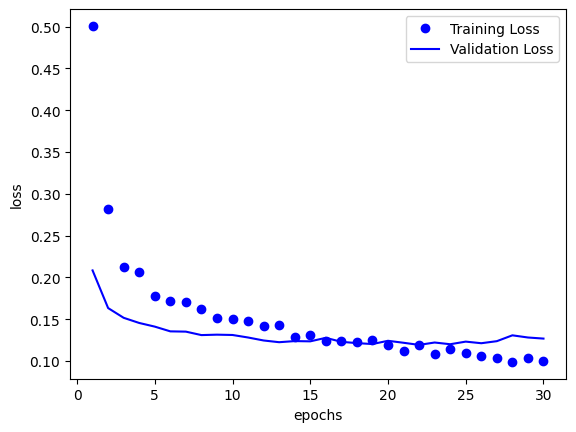

In [ ]:
import re
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt


# Build neural network model
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

# Compile model
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Determine how many epochs
history = model.fit(X_train, Y_train, epochs = 30, batch_size=32, validation_split = 0.2)

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss)+1)

plt.plot(epochs,loss, 'bo', label = "Training Loss")
plt.plot(epochs, val_loss, 'b', label = "Validation Loss")
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()


The plot above shows the training loss and validation loss over 1- 30 epochs. To determine the best epoch number, it is required to look at the point where the validation loss stops improving and starts to stabilize or increase. If the training loss continues to decrease, it can indicate overfitting

From the plot, it appears that the validation loss stabilizes from 15 epochs and does not show significant improvement beyond that point. Therefore, the best epoch number seems to be 15. Setting the epoch number to 15 will help achieving a balance between underfitting and overfitting, ensuring the model generalizes well to unseen data.

### Train & Test Model

In [ ]:
# Train model
model.fit(X_train, Y_train, epochs=15, batch_size=32, validation_split=0.2)


Epoch 1/15
230/230 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9698 - loss: 0.0871 - val_accuracy: 0.9580 - val_loss: 0.1325
Epoch 2/15
230/230 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9682 - loss: 0.0924 - val_accuracy: 0.9569 - val_loss: 0.1356
Epoch 3/15
230/230 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9682 - loss: 0.0999 - val_accuracy: 0.9613 - val_loss: 0.1296
Epoch 4/15
230/230 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9635 - loss: 0.1048 - val_accuracy: 0.9619 - val_loss: 0.1257
Epoch 5/15
230/230 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9667 - loss: 0.0943 - val_accuracy: 0.9597 - val_loss: 0.1289
Epoch 6/15
230/230 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9689 - loss: 0.0885 - val_accuracy: 0.9591 - val_loss: 0.1333
Epoch 7/15
230/230 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9701 - loss: 0.0833 - val_accuracy: 0.9580 - val_loss: 0.1346
Epoch 8/15
230/230 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9692 - loss: 0.0869 - val_accuracy: 0.

### Evaluation

In [ ]:
y_pred_probs = model.predict(X_test)
y_pred = (y_pred_probs > 0.5).astype(int)  # Convert probabilities to binary predictions

from sklearn.metrics import classification_report
print(classification_report(Y_test, y_pred))

72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      1157
           1       0.97      0.97      0.97      1129

    accuracy                           0.97      2286
   macro avg       0.97      0.97      0.97      2286
weighted avg       0.97      0.97      0.97      2286

